In [1]:
#Load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#Read the csv file and drop Unnamed column
data = pd.read_csv('Notebook_steptwo.ipynb.csv')
columns = list(data.columns)
data = data.drop(columns = columns[0])
data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939.0,2500.0,250.0,1.0,0.0,0.0,2.0,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600.0,1540.0,1200.0,0.0,0.0,0.0,0.0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090.0,294.0,1796.0,0.0,0.0,0.0,0.0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500.0,2300.0,9200.0,0.0,0.0,1.0,0.0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100.0,1800.0,9200.0,0.0,0.0,0.0,1.0,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [3]:
#Make a list of the columns for future use in loop functions
columns = list(data.columns)
columns

['Name',
 'Region',
 'state',
 'summit_elev',
 'vertical_drop',
 'base_elev',
 'trams',
 'fastEight',
 'fastSixes',
 'fastQuads',
 'quad',
 'triple',
 'double',
 'surface',
 'total_chairs',
 'Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekday',
 'AdultWeekend',
 'projectedDaysOpen',
 'NightSkiing_ac']

In [4]:
#Look at the statistical characteristics for each column with describe function
#See count, mean, std, and quantiles
data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


In [5]:
#Create a separate list with numeric columns for future use
numeric_columns = columns[3:]
numeric_columns

['summit_elev',
 'vertical_drop',
 'base_elev',
 'trams',
 'fastEight',
 'fastSixes',
 'fastQuads',
 'quad',
 'triple',
 'double',
 'surface',
 'total_chairs',
 'Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekday',
 'AdultWeekend',
 'projectedDaysOpen',
 'NightSkiing_ac']

Build data profile tables and plots

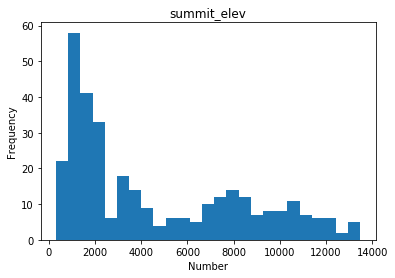

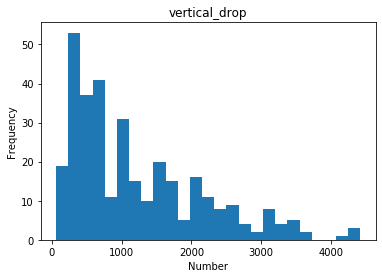

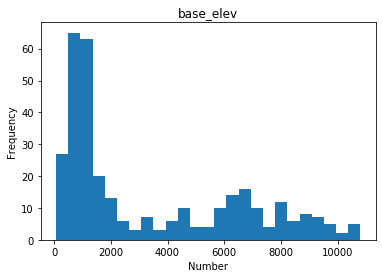

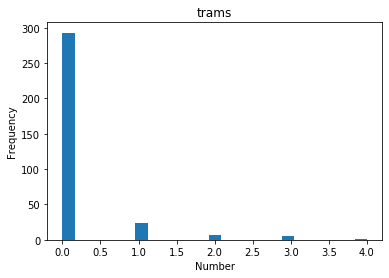

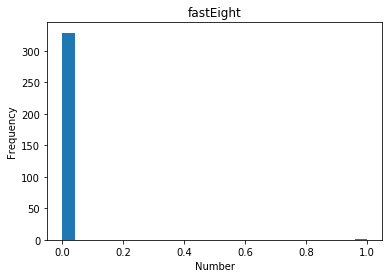

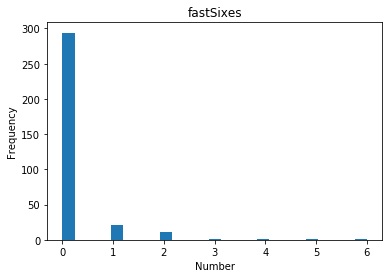

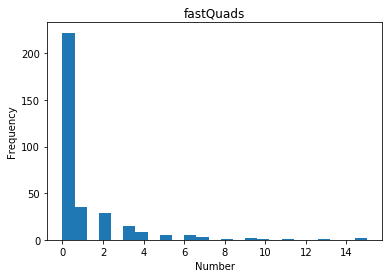

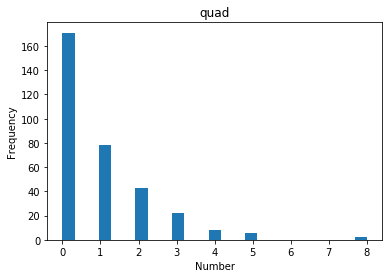

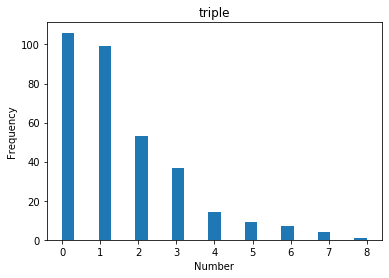

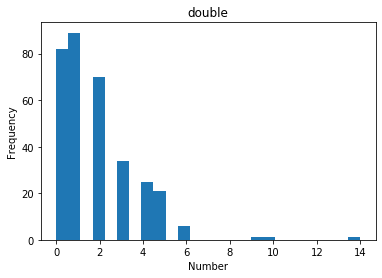

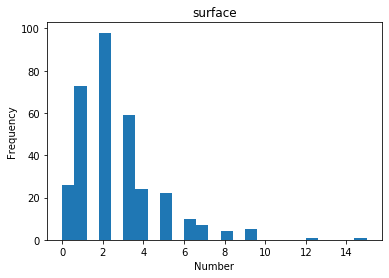

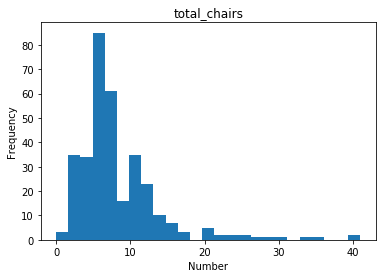

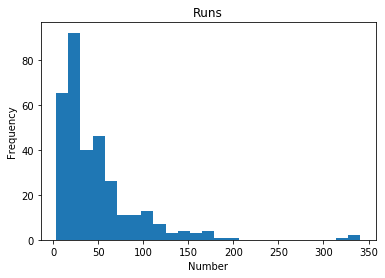

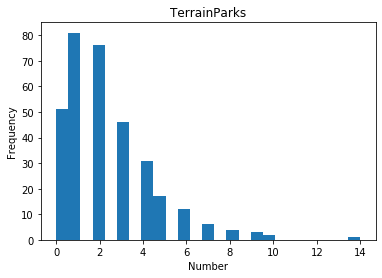

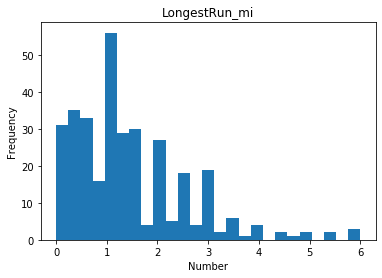

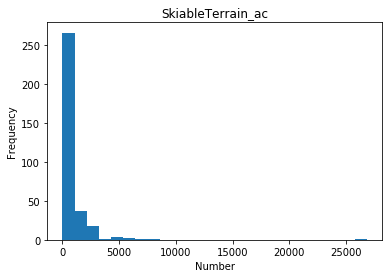

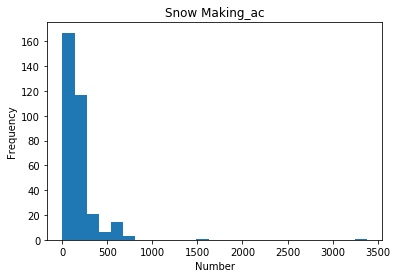

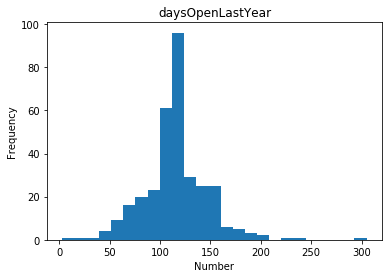

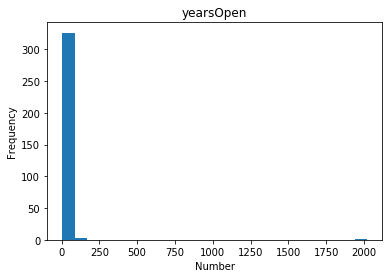

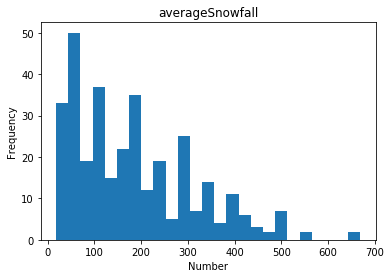

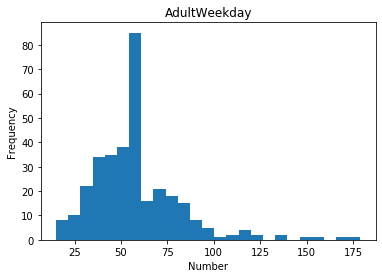

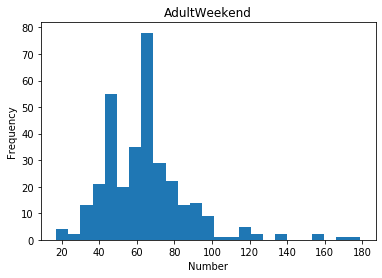

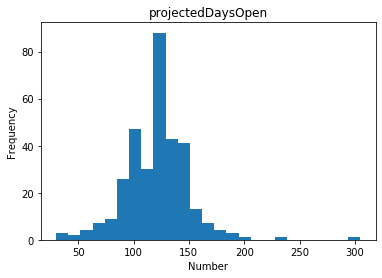

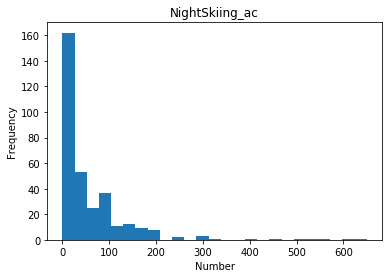

In [6]:
#Create histogram for the numeric columns to see their characteristics 
for col in numeric_columns:
    data[col].plot(kind = 'hist', bins = 25)
    plt.xlabel('Number')
    plt.title(col)
    plt.show()

In [7]:
#According to the data, most of the graphics are skeewed to the right. 
#daysOpenLastYear looks to be normal distributed (at least kind of)
#fastEight has one outlier and trams, fastSixes, fastQuads, quad as well. We can double check this further. 
#yearsOpen clearly has one outlier. NightSkiing_ac probably. 
#This depends on the standard deviation and the application of the theory to determine outliers. 
#The chairs features looks to be highly correlated because their similar form of the histograms
#Skiable Terrain_ac and Snow Making_ac looks to be correlated as well
#AdultWeekday and Adult Weekend looks to be correlated too. 


Create a barplot for the categorical features Region and state where the heights of the bars are the counts of 
each level in that variable.

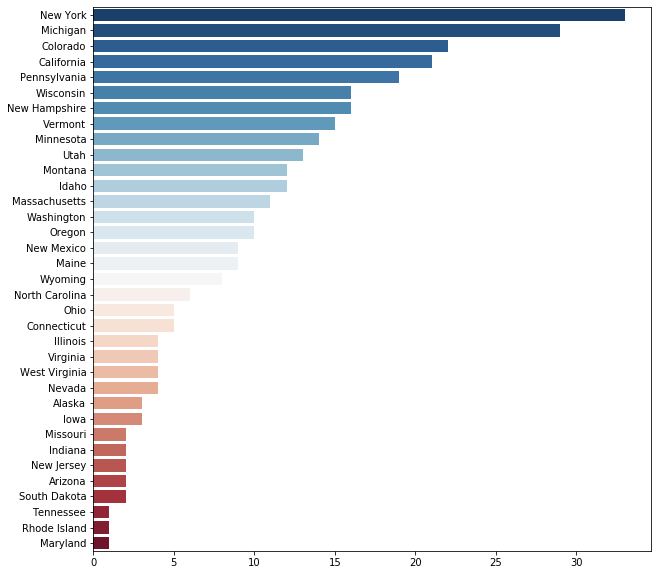

In [8]:
#Bar Plot for state
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
state_value = pd.DataFrame(data.state.value_counts())

# Get the state names by calling list() on the x.index
names = list(state_value.index)

# Get the values by plugging x.state into the list() function
values = list(state_value['state'])

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")


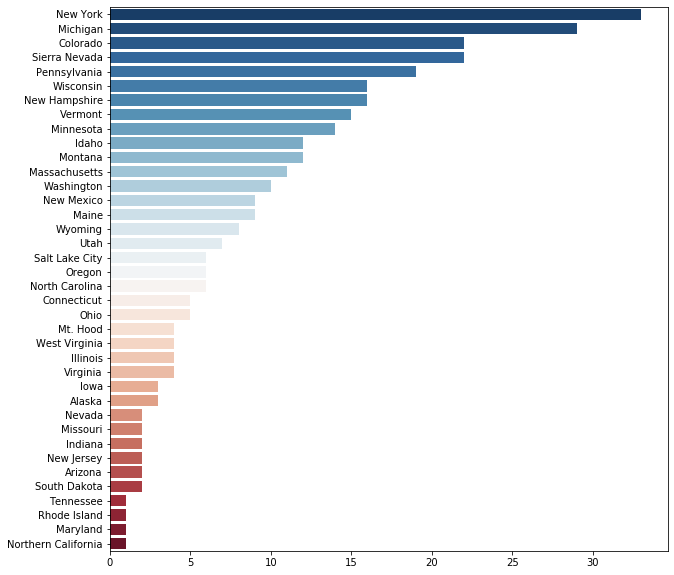

In [9]:
#Bar plot for region
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
region_value = pd.DataFrame(data.Region.value_counts())

# Get the state names by calling list() on the x.index
names = list(region_value.index)

# Get the values by plugging x.state into the list() function
values = list(region_value['Region'])

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")


In [10]:
#As we can see on the graphics before, Region and state are redundat.
#Removed Region column
data_new = data.drop(columns = columns[1])
data_new.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939.0,2500.0,250.0,1.0,0.0,0.0,2.0,2.0,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600.0,1540.0,1200.0,0.0,0.0,0.0,0.0,0.0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,2090.0,294.0,1796.0,0.0,0.0,0.0,0.0,0.0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500.0,2300.0,9200.0,0.0,0.0,1.0,0.0,2.0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,11100.0,1800.0,9200.0,0.0,0.0,0.0,1.0,2.0,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [11]:
data.shape

(330, 27)

In [12]:
#Create a list with the new columns without Region columns
new_columns = list(data_new.columns)

Anamolies & Outliers - Review boxplots

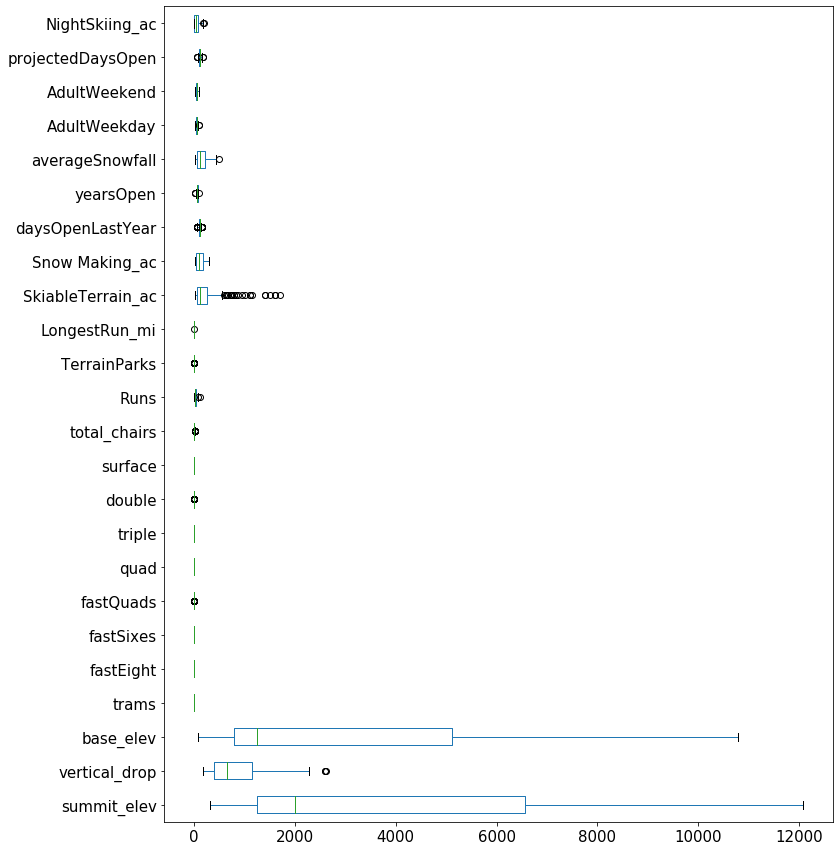

In [13]:
#Get the Interquartile range. Quantile 3 - Quantile 1
#Get Quantile 1 and Quantile 3
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)

#Calculate Interquartile range(IQR)
IQR = Q3 - Q1

#Filtering the data on our existing dataframe, picking out just those observations that are NOT outliers. 
data_new_no =  data_new[~((data_new < (Q1 - 1.5 * IQR)) |(data_new> (Q3 + 1.5 * IQR))).any(axis=1)]
data_new_no.reset_index(drop = True, inplace = True)

#Make a boxplot of this new dataframe dfno. 
data_new_no_boxplot = data_new_no.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [14]:
#Time to compare the shapes with and without the outliers
#We see a reduction of 154 rows
print(data.shape)
print(data_new_no.shape)

(330, 27)
(176, 26)


Review the AdultWeekday,AdultWeekend response variable distributions

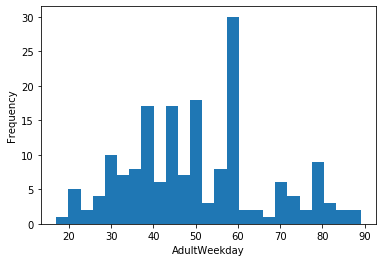

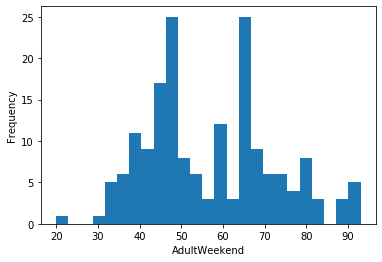

In [15]:
# Make a histogram of the 'AdultWeekday' and 'AdultWeekend' column of the dfno dataframe. 
week_cols = ['AdultWeekday', 'AdultWeekend']
for col in week_cols:
    data_new_no[col].plot(kind = 'hist', bins = 25)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.show()


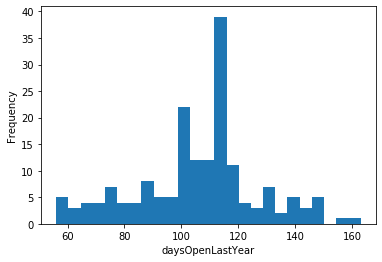

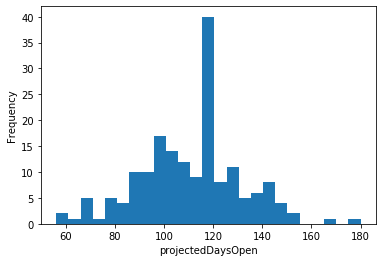

In [16]:
# Make a histogram of the daysOpenLastYear and projecteDaysOpen columns
days_col = ['daysOpenLastYear', 'projectedDaysOpen']
for col in days_col:
    data_new_no[col].plot(kind = 'hist', bins =25)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.show()

Explore data relationships

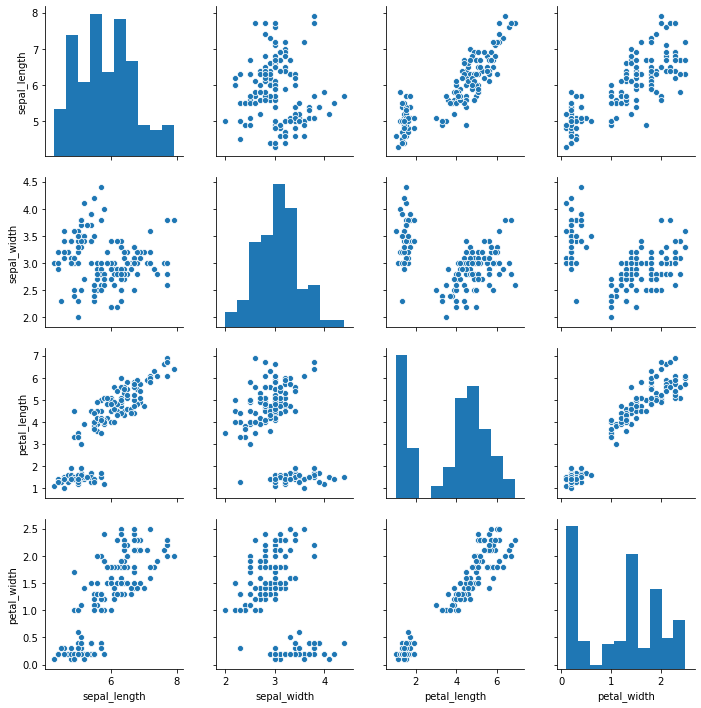

In [17]:
#Graphic a pairplot
iris = sns.load_dataset('iris')
sns.pairplot(iris)


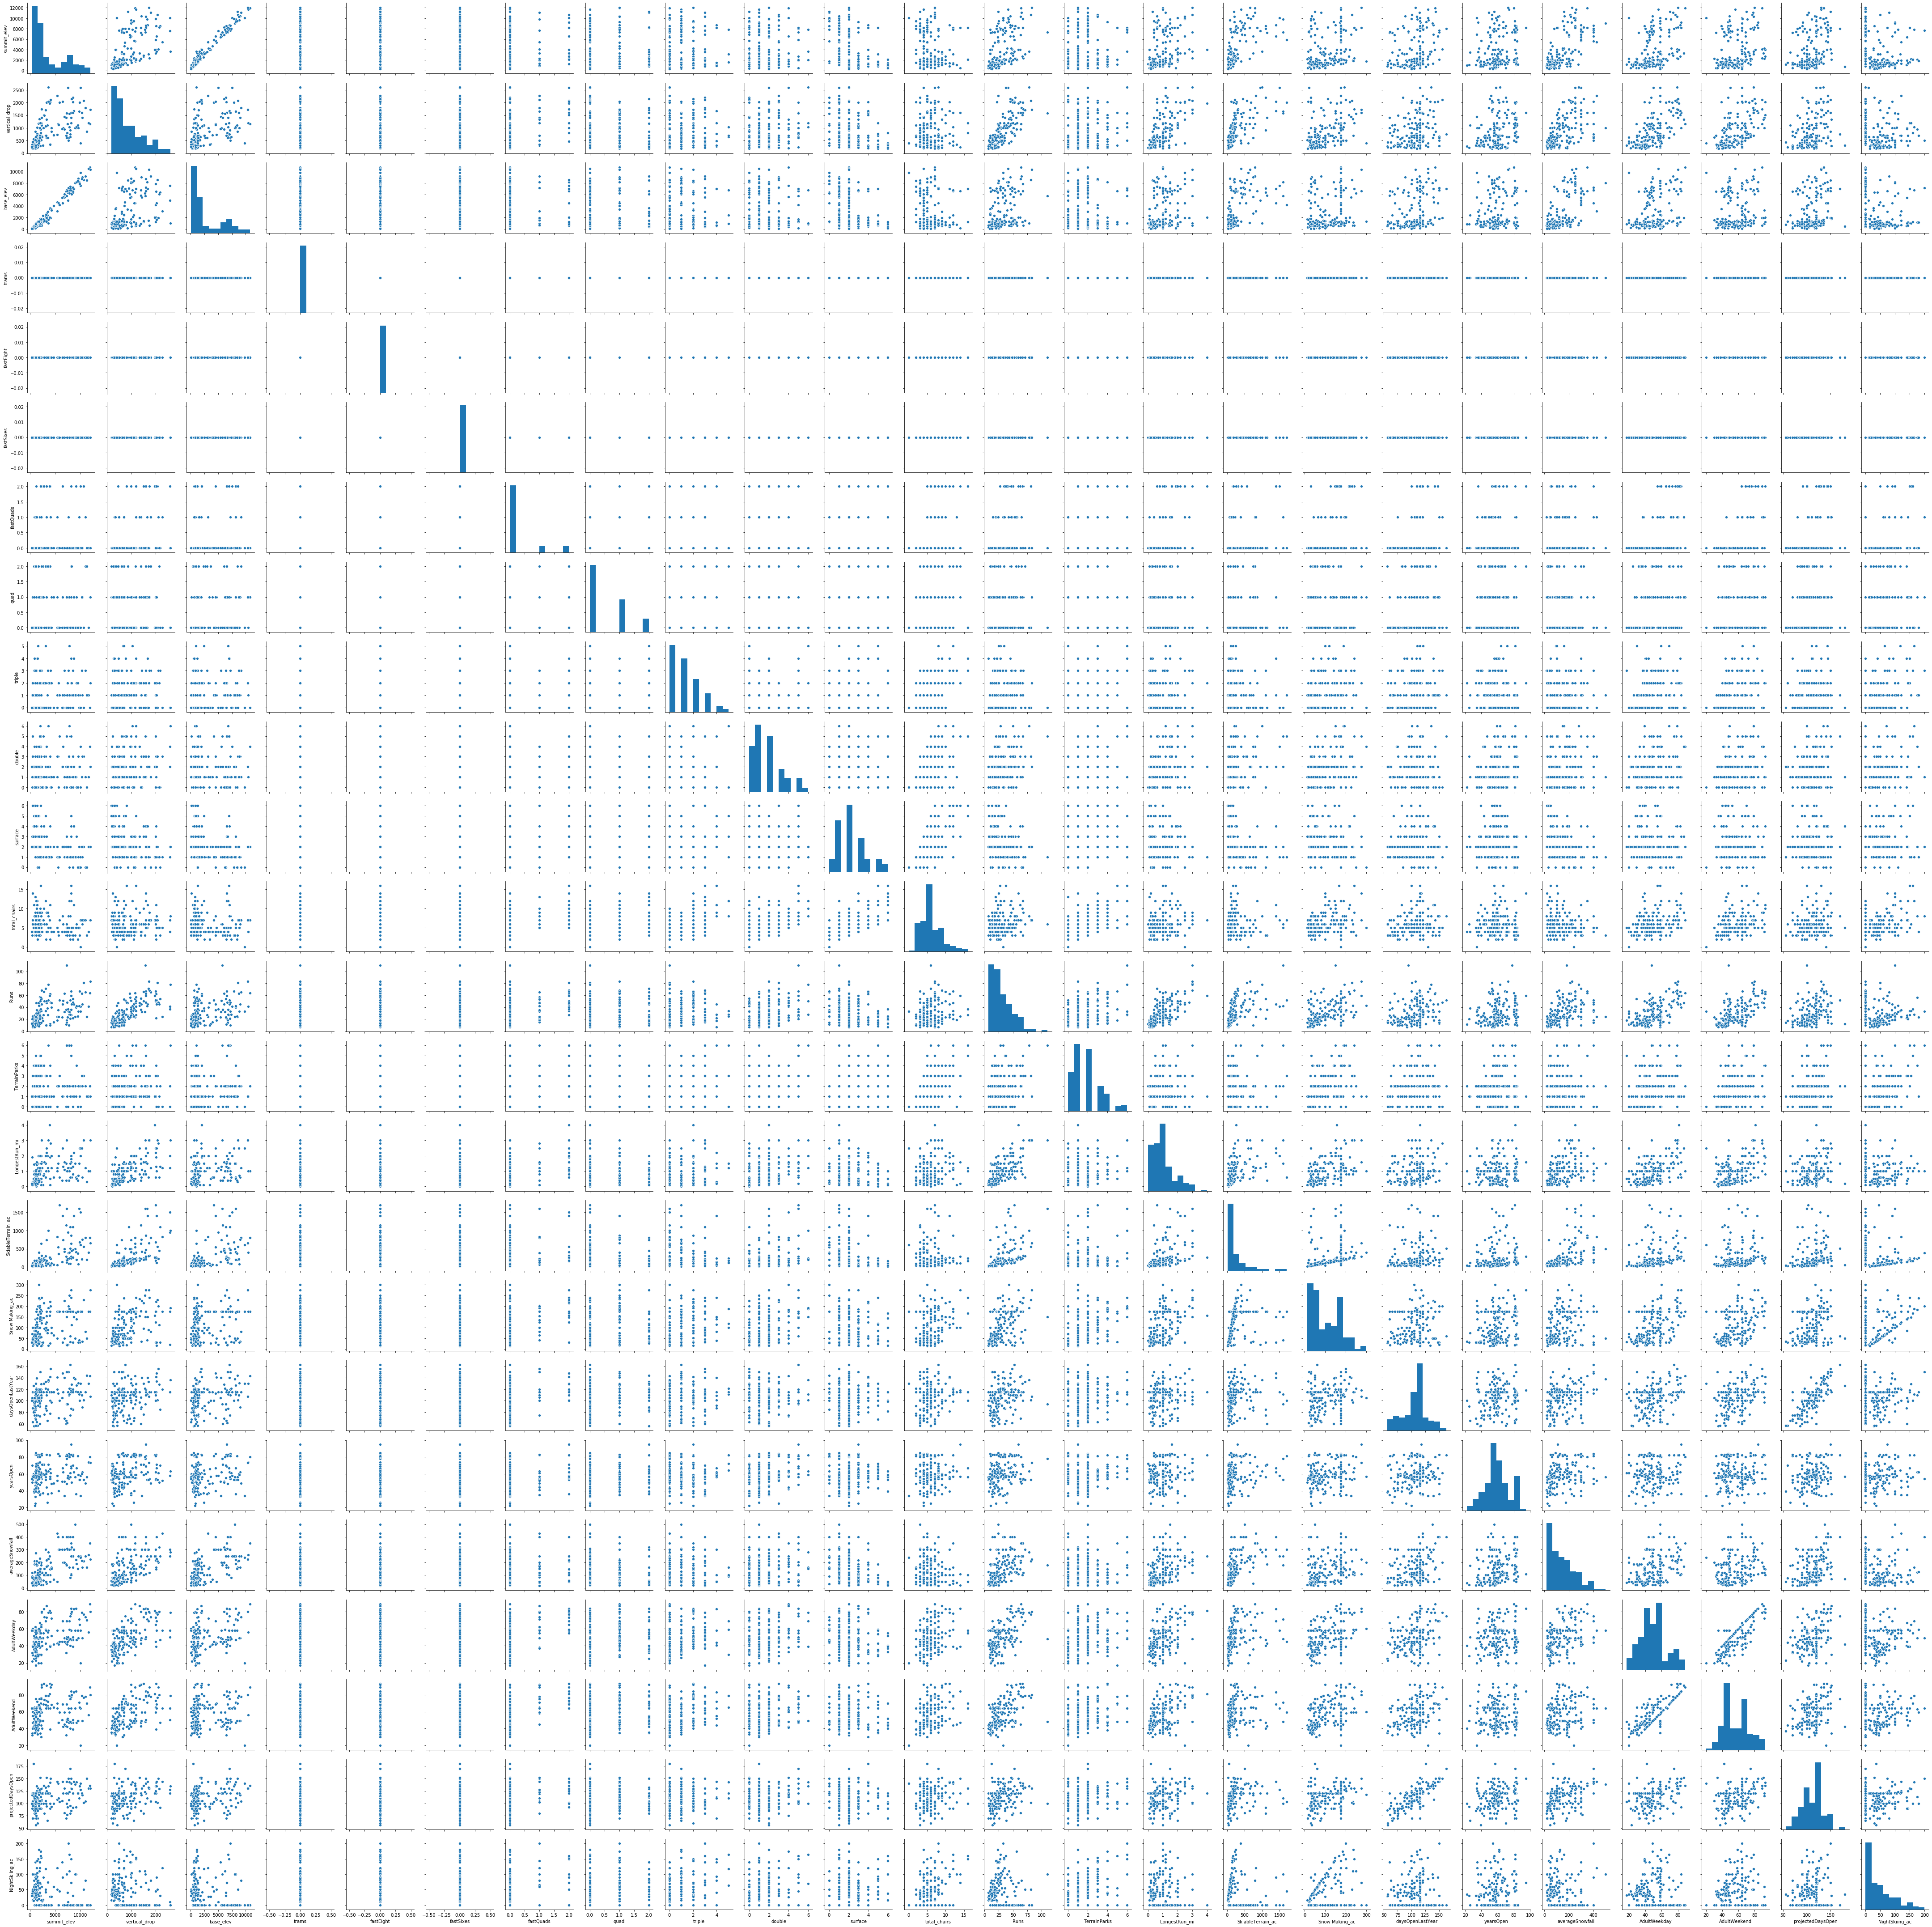

In [18]:
sns.pairplot(data_new_no, vars = numeric_columns)

Identification and creation of features

In [19]:
#Calculate the correlation coefficients
corr = data_new_no.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')



/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1,0.62,0.99,nan,nan,nan,0.15,-0.05,0.06,0.09,-0.38,-0.1,0.5,0.04,0.37,0.62,0.35,0.29,0.21,0.68,0.41,0.25,0.29,-0.24
vertical_drop,0.62,1,0.49,nan,nan,nan,0.4,-0.05,0.08,0.23,-0.34,0.06,0.74,0.12,0.63,0.67,0.44,0.26,0.26,0.57,0.58,0.53,0.31,-0.18
base_elev,0.99,0.49,1,nan,nan,nan,0.08,-0.05,0.05,0.06,-0.35,-0.12,0.41,0.02,0.29,0.56,0.3,0.27,0.18,0.64,0.34,0.17,0.25,-0.23
trams,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastEight,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastSixes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastQuads,0.15,0.4,0.08,nan,nan,nan,1,0.14,0.18,0.14,0.06,0.43,0.37,0.27,0.38,0.19,0.39,0.22,0.02,0.08,0.46,0.47,0.24,0.14
quad,-0.05,-0.05,-0.05,nan,nan,nan,0.14,1,0.16,-0.17,0.19,0.36,0.07,0.12,-0.03,-0.08,0.09,0.14,-0.08,-0.2,0.15,0.23,0.1,0.16
triple,0.06,0.08,0.05,nan,nan,nan,0.18,0.16,1,-0.12,0.11,0.52,0.13,0.32,0.11,-0.03,0.23,0.06,-0.03,-0.01,0.24,0.31,0.09,0.28
double,0.09,0.23,0.06,nan,nan,nan,0.14,-0.17,-0.12,1,-0.02,0.47,0.34,0.32,0.21,0.28,0.27,0.06,0.22,0.15,0.21,0.22,0.14,0.11


In [20]:
# Step 1. Call the variable corr_matrix
corr_matrix = data_new_no.corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]







In [21]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [22]:
print('Reduced dataframe size: ',data_new_no.drop(data_new_no[to_drop], axis=1).shape)

Reduced dataframe size:  (176, 25)


In [23]:
# Now replace dfno by the result of dropping the columns in the to_drop variable from it
dfno = data_new_no.drop(data_new_no[to_drop], axis=1)

Clustering

In [24]:
x = dfno.drop(['Name','state'], axis =1).values

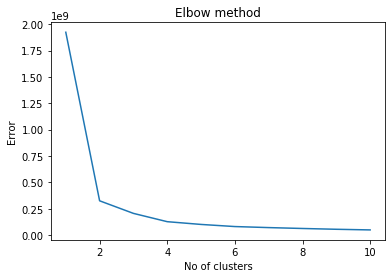

In [25]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

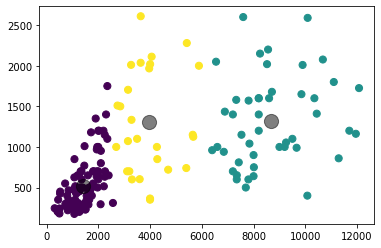

In [26]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results.
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [27]:
#Add the clusters to your dataframe as a new column to include in the next step 
dfno['clusters'] = y_kmeans3

In [28]:
pd.set_option('max_columns', None)
dfno.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,0
1,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,7.0,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,1
2,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,5.0,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,1
3,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,8.0,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,1
4,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,12.0,67.0,5.0,2.0,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,1


In [34]:
data.to_csv('step3_output.csv')